In [161]:
import pandas as pd
import datetime as dt 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)

from pylab import rcParams
rcParams['figure.figsize'] = (18,7)

In [163]:
df = pd.read_csv('tortilla_prices.csv')
df

,State,City,Year,Month,Day,Store type,Price per kilogram
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.90
1,Baja California,Mexicali,2007,1,10,Mom and Pop Store,NaN
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.00
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.00
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.00
...,...,...,...,...,...,...,...
284389,Veracruz,Coatzacoalcos,2024,7,8,Big Retail Store,12.50
284390,Veracruz,Veracruz,2024,7,8,Big Retail Store,13.60
284391,Veracruz,Xalapa,2024,7,8,Big Retail Store,14.33
284392,Yucatán,Mérida,2024,7,8,Big Retail Store,13.40


In [164]:
df_jalisco = df[df['State'] == 'Jalisco']
combinations = df_jalisco[['City', 'Store type']].drop_duplicates()

dfs = {}

for index, row in combinations.iterrows():
    city = row['City']
    store_type = row['Store type']
    
    df_filtered = df_jalisco[(df_jalisco['City'] == city) & (df_jalisco['Store type'] == store_type)]
    
    df_filtered = df_filtered.groupby(['Year', 'Month']).agg({
        'Price per kilogram': 'mean'
    }).reset_index()

    df_filtered['Date'] = pd.to_datetime(df_filtered['Year'].astype(str) + '-' + df_filtered['Month'].astype(str) + '-01')
    df_filtered.set_index('Date', inplace=True)
    df_filtered.drop(columns=['Year', 'Month'], inplace=True)

    df_name = f"{city.replace(' ', '_')}_{store_type.replace(' ', '_')}"
    
    dfs[df_name] = df_filtered

In [165]:
for df_name, df_filtered in dfs.items():
    df_filtered.fillna(method='ffill', inplace=True)
    df_filtered.fillna(method='bfill', inplace=True)

C:\Users\esteb\AppData\Local\Temp\ipykernel_31948\2274903202.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered.fillna(method='ffill', inplace=True)
C:\Users\esteb\AppData\Local\Temp\ipykernel_31948\2274903202.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered.fillna(method='bfill', inplace=True)


In [166]:
data = dfs["Guadalajara_Mom_and_Pop_Store"]

In [167]:
data

,Price per kilogram
Date,
2007-01-01,9.042353
2007-02-01,8.519130
2007-03-01,8.512308
2007-04-01,8.523636
2007-05-01,8.534783
...,...
2024-03-01,24.850000
2024-04-01,24.864615
2024-05-01,24.830833


In [168]:
df = pd.DataFrame({"ds":data.index, "y":data["Price per kilogram"], "unique_id": "Tortilla"})
df.head()

,ds,y,unique_id
Date,,,
2007-01-01,2007-01-01,9.042353,Tortilla
2007-02-01,2007-02-01,8.519130,Tortilla
2007-03-01,2007-03-01,8.512308,Tortilla
2007-04-01,2007-04-01,8.523636,Tortilla
2007-05-01,2007-05-01,8.534783,Tortilla


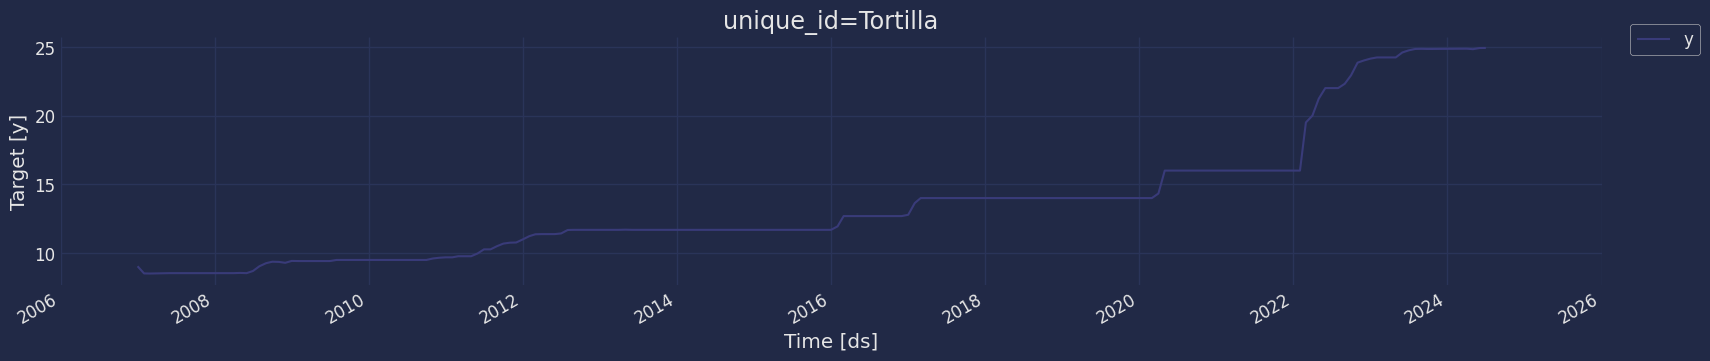

In [169]:
from statsforecast import StatsForecast

StatsForecast.plot(df)

Como vemos que la serie crece en los ultimos periodos pero parece que se va a suavizar creo que podriamos tener una tendecian aditiva suavizada(Ad)  
Como observamos que la serie no cuenta con una estacionalidad clara la prodria mos dejar sin estacionalidad (N)


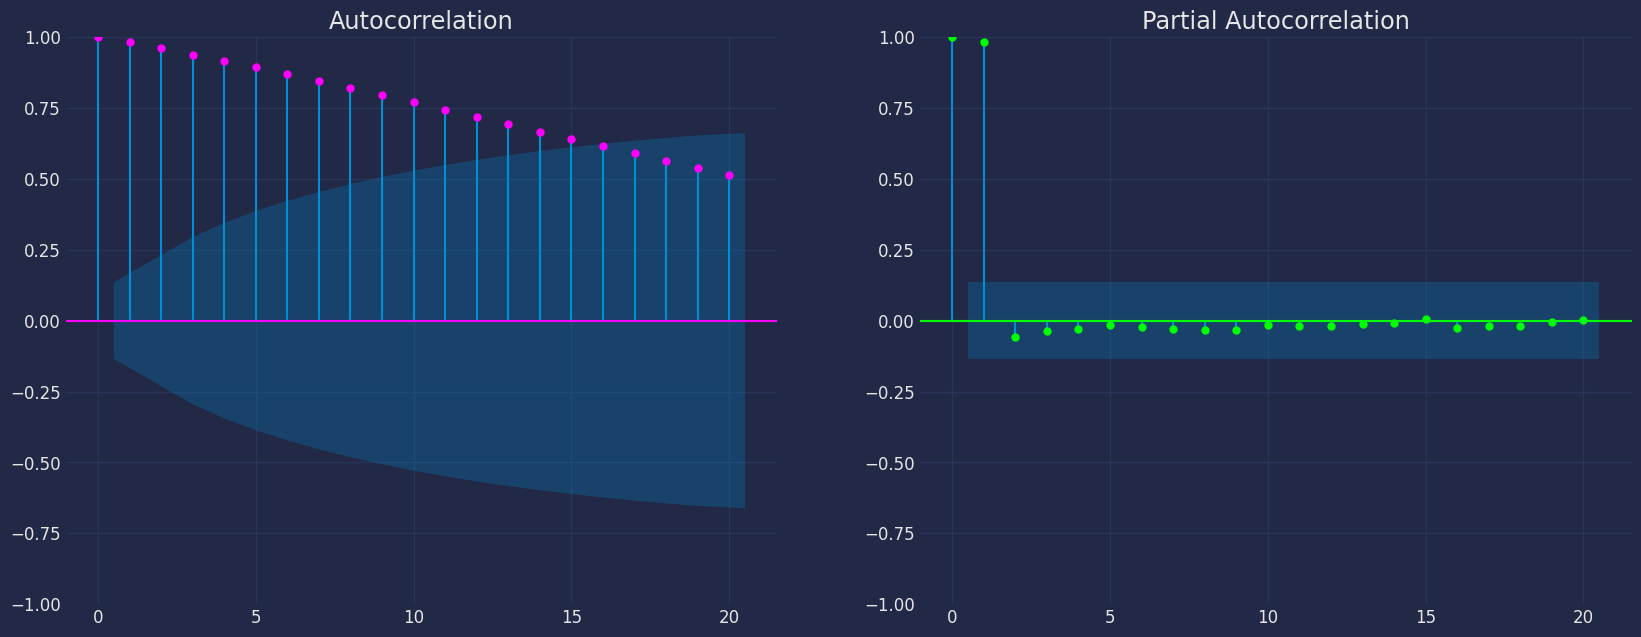

In [170]:
fig, axs = plt.subplots(nrows=1, ncols=2)

plot_acf(df["y"],  lags=20, ax=axs[0],color="fuchsia")
axs[0].set_title("Autocorrelation");

# Plot
plot_pacf(df["y"],  lags=20, ax=axs[1],color="lime")
axs[1].set_title('Partial Autocorrelation')

plt.show();


Vemos como los resagos son practicamente irrelenaves salvo el inmediatamente anterior 

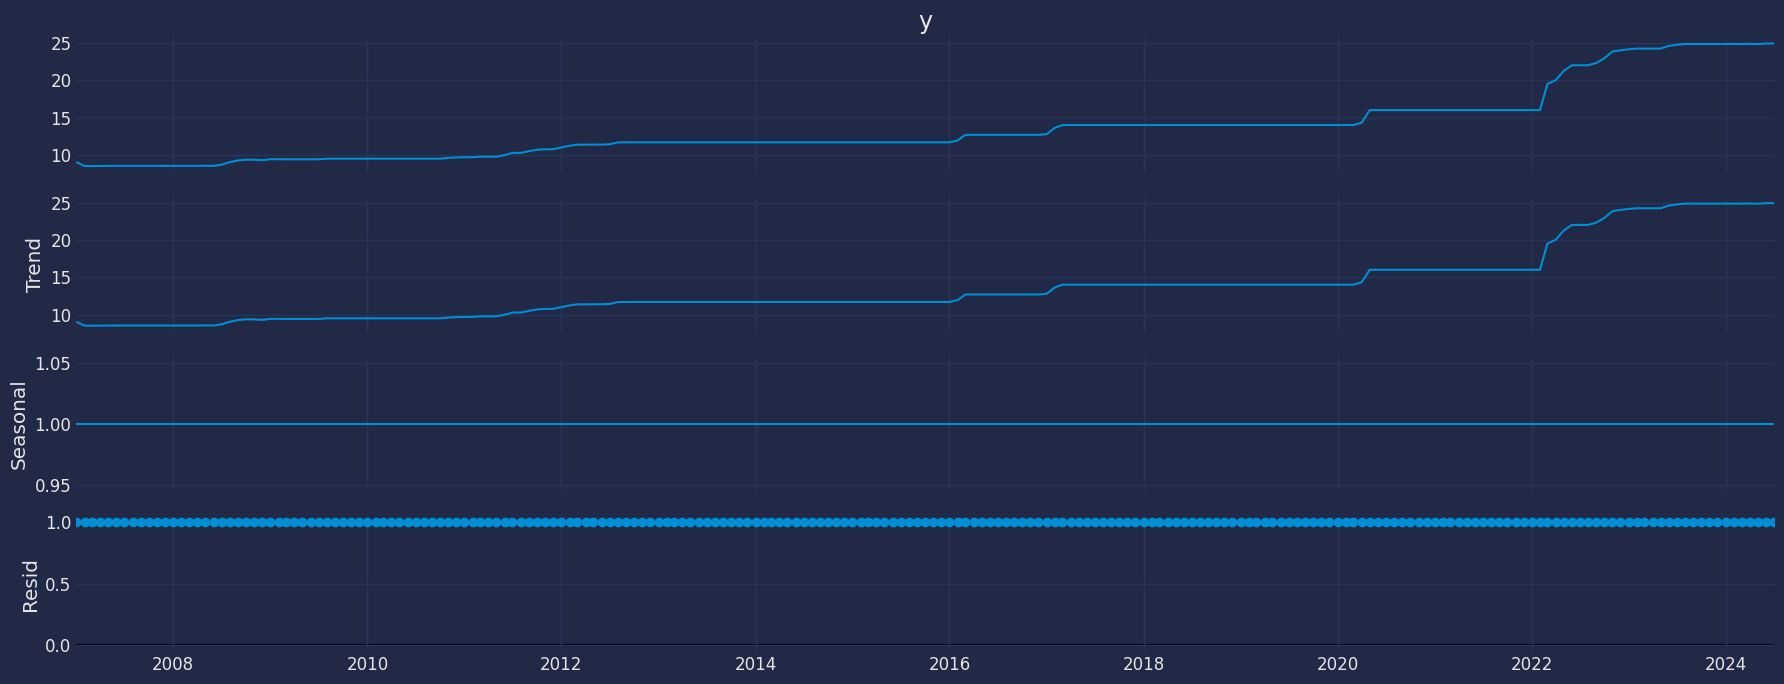

In [171]:
from statsmodels.tsa.seasonal import seasonal_decompose 
a = seasonal_decompose(df["y"], model = "mul", period=1)
a.plot();

In [172]:
train = df.iloc[:192]
test = df.iloc[192:]
print(len(train), len(test))    
horizon = len(test)

192 19


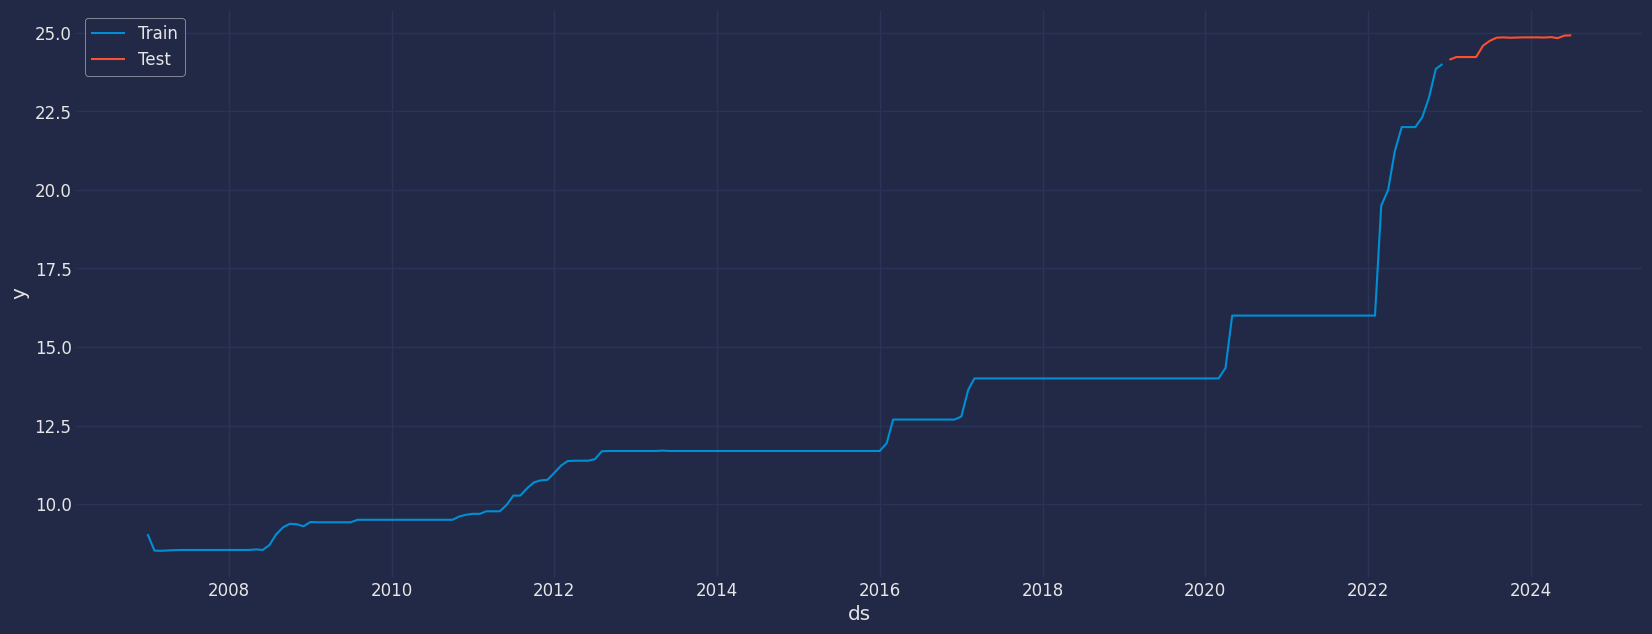

In [173]:
sns.lineplot(train,x="ds", y="y", label="Train")
sns.lineplot(test, x="ds", y="y", label="Test")
plt.show()

In [174]:
from statsforecast.models import AutoETS
autoets = AutoETS(model=["M","A","N"], damped=True, alias="AutoETS", season_length=1)

In [175]:
autoets = autoets.fit(df["y"].values)
autoets

AutoETS

In [176]:
y_hat_dict = autoets.predict(h=horizon)
y_hat_dict

{'mean': array([24.92822908, 24.9364576 , 24.94304041, 24.94830667, 24.95251967,
        24.95589007, 24.9585864 , 24.96074345, 24.9624691 , 24.96384962,
        24.96495403, 24.96583756, 24.96654438, 24.96710984, 24.96756221,
        24.96792411, 24.96821362, 24.96844523, 24.96863052])}

In [177]:
test.head()

,ds,y,unique_id
Date,,,
2023-01-01,2023-01-01,24.143077,Tortilla
2023-02-01,2023-02-01,24.230000,Tortilla
2023-03-01,2023-03-01,24.230000,Tortilla
2023-04-01,2023-04-01,24.230000,Tortilla
2023-05-01,2023-05-01,24.230000,Tortilla


In [178]:
forecast=pd.Series(pd.date_range("2023-01-01", freq="MS", periods=horizon))
forecast=pd.DataFrame(forecast)
forecast.columns=["ds"]
forecast["hat"]=y_hat_dict.get("mean")
forecast["unique_id"]="1"
forecast


,ds,hat,unique_id
0,2023-01-01,24.928229,1
1,2023-02-01,24.936458,1
2,2023-03-01,24.943040,1
3,2023-04-01,24.948307,1
4,2023-05-01,24.952520,1
5,2023-06-01,24.955890,1
6,2023-07-01,24.958586,1
7,2023-08-01,24.960743,1
8,2023-09-01,24.962469,1
9,2023-10-01,24.963850,1


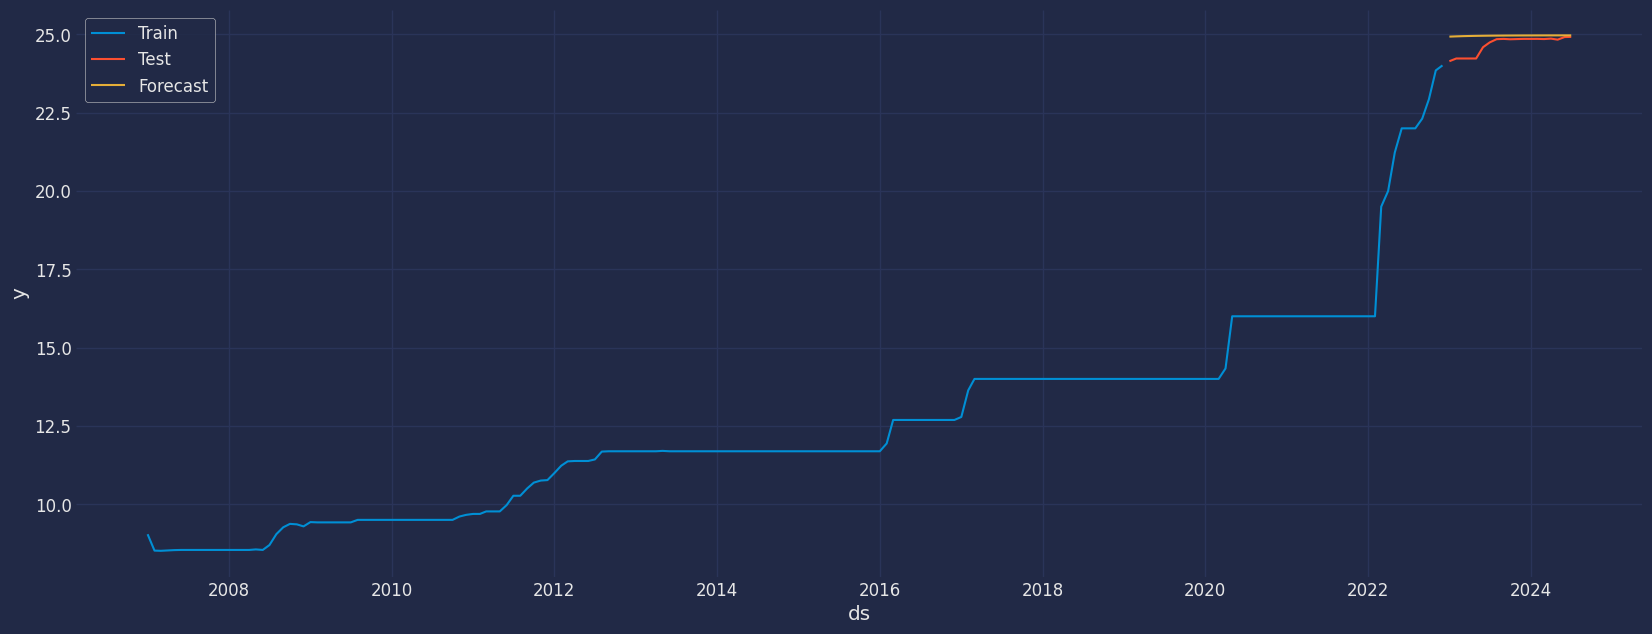

In [179]:
sns.lineplot(train,x="ds", y="y", label="Train")
sns.lineplot(test, x="ds", y="y", label="Test")
sns.lineplot(forecast,x="ds", y="hat", label="Forecast",)
plt.show()


In [180]:
y_hat_dict = autoets.predict(h=horizon, level=[80,90,95])
y_hat_dict

{'mean': array([24.92822908, 24.9364576 , 24.94304041, 24.94830667, 24.95251967,
        24.95589007, 24.9585864 , 24.96074345, 24.9624691 , 24.96384962,
        24.96495403, 24.96583756, 24.96654438, 24.96710984, 24.96756221,
        24.96792411, 24.96821362, 24.96844523, 24.96863052]),
 'lo-95': array([23.94739612, 23.43394484, 22.97934596, 22.55655803, 22.15739495,
        21.77825948, 21.41704142, 21.07219653, 20.74243192, 20.4265918 ,
        20.12361529, 19.83252084, 19.55240011, 19.28241467, 19.02179324,
        18.76982845, 18.52587332, 18.28933723, 18.05968179]),
 'lo-90': array([24.10508811, 23.67550914, 23.29505608, 22.94108794, 22.60677706,
        22.28913841, 21.98642816, 21.697372  , 21.42090225, 21.15606282,
        20.90197448, 20.65782237, 20.42285127, 20.19636327, 19.97771559,
        19.76631826, 19.56163121, 19.3631611 , 19.17045797]),
 'lo-80': array([24.28689688, 23.95401731, 23.65904963, 23.38442629, 23.12488585,
        22.87814911, 22.64289461, 22.41815928, 22

In [181]:
forecast["hat"]=y_hat_dict.get("mean")

forecast["lo-80"]=y_hat_dict.get("lo-80")
forecast["hi-80"]=y_hat_dict.get("hi-80")

forecast["lo-90"]=y_hat_dict.get("lo-80")
forecast["hi-90"]=y_hat_dict.get("hi-80")

forecast["lo-95"]=y_hat_dict.get("lo-95")
forecast["hi-95"]=y_hat_dict.get("hi-95")
forecast


,ds,hat,unique_id,lo-80,hi-80,lo-90,hi-90,lo-95,hi-95
0,2023-01-01,24.928229,1,24.286897,25.569561,24.286897,25.569561,23.947396,25.909062
1,2023-02-01,24.936458,1,23.954017,25.918898,23.954017,25.918898,23.433945,26.438970
2,2023-03-01,24.943040,1,23.659050,26.227031,23.659050,26.227031,22.979346,26.906735
3,2023-04-01,24.948307,1,23.384426,26.512187,23.384426,26.512187,22.556558,27.340055
4,2023-05-01,24.952520,1,23.124886,26.780153,23.124886,26.780153,22.157395,27.747644
5,2023-06-01,24.955890,1,22.878149,27.033631,22.878149,27.033631,21.778259,28.133521
6,2023-07-01,24.958586,1,22.642895,27.274278,22.642895,27.274278,21.417041,28.500131
7,2023-08-01,24.960743,1,22.418159,27.503328,22.418159,27.503328,21.072197,28.849290
8,2023-09-01,24.962469,1,22.203135,27.721803,22.203135,27.721803,20.742432,29.182506
9,2023-10-01,24.963850,1,21.997096,27.930603,21.997096,27.930603,20.426592,29.501107


In [182]:
df=df.set_index("ds")
forecast=forecast.set_index("ds")

In [183]:
df['unique_id'] = df['unique_id'].astype(object)
df_plot=df.merge(forecast, how='left', on=['unique_id', 'ds'])

In [184]:
df_plot = df_plot[-24:]

C:\Users\esteb\AppData\Local\Temp\ipykernel_31948\2378475230.py:2: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(df_plot.index, df_plot["y"],label="Actual", linestyle="-")
C:\Users\esteb\AppData\Local\Temp\ipykernel_31948\2378475230.py:3: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(df_plot.index, df_plot["hat"],label="Forecas", linestyle="-")


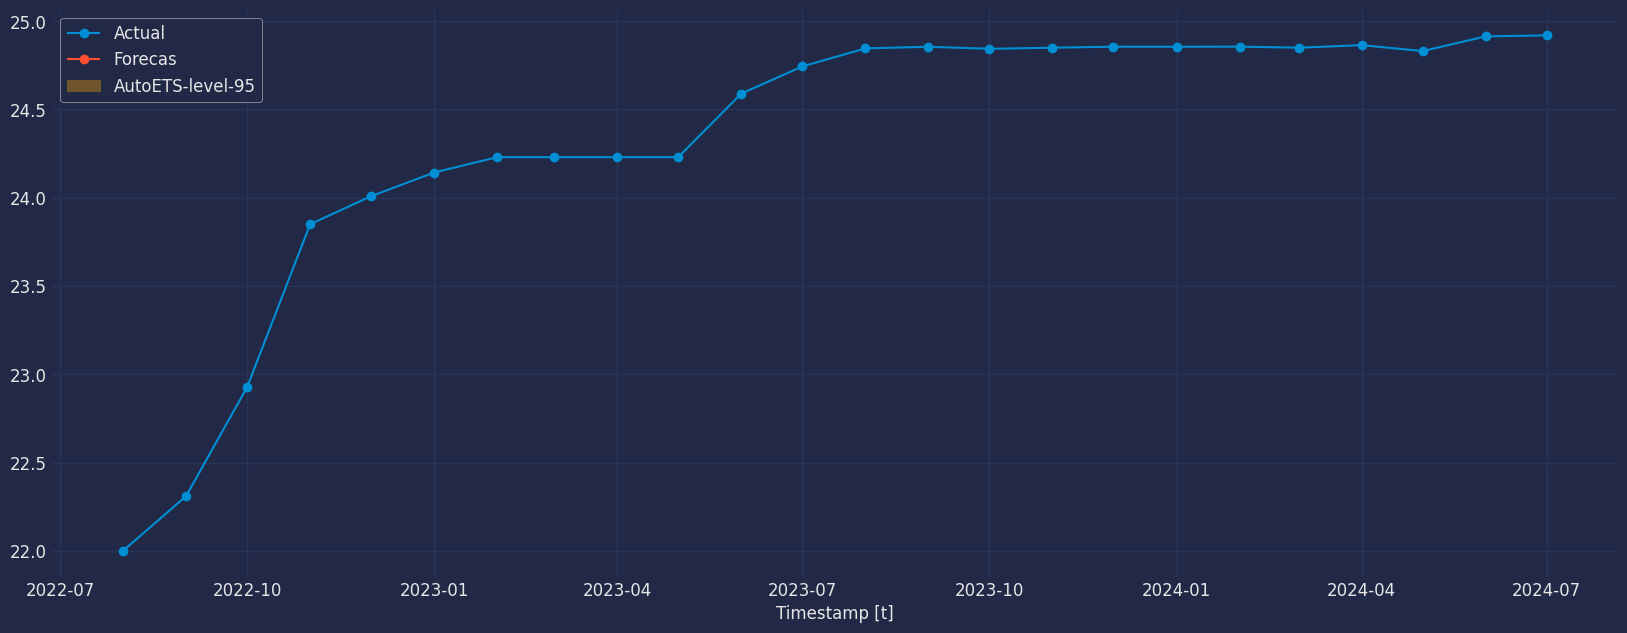

In [185]:
fig, ax = plt.subplots()
plt.plot_date(df_plot.index, df_plot["y"],label="Actual", linestyle="-")
plt.plot_date(df_plot.index, df_plot["hat"],label="Forecas", linestyle="-")
ax.fill_between(df_plot.index, 
                df_plot['lo-80'], 
                df_plot['hi-80'],
                alpha=.35,
                color='orange',
                label='AutoETS-level-95')
ax.set_title('', fontsize=22)
ax.set_ylabel('', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=12)
plt.legend(fontsize=12)
ax.grid(True)

plt.show()

In [186]:
from sklearn import metrics

In [187]:
def model_evaluation(y_true, y_pred, model):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print (f'Model Evaluation: {model}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}')
    print(f'corr is : {np.corrcoef(y_true, y_pred)[0,1]}',end='\n\n')


In [188]:
model_evaluation(test["y"], forecast["hat"], "AutoETS")

Model Evaluation: AutoETS
MSE is : 0.1568196950415211
MAE is : 0.28820046899665863
RMSE is : 0.39600466542898344
MAPE is : 1.1810852095186706
R2 is : -0.9682625775422016
corr is : 0.9269687464800286



## ETS (ZZZ)

In [189]:
from statsforecast.models import AutoETS
autoets = AutoETS(model=["Z","Z","Z"], damped=True, alias="AutoETS", season_length=1)

In [190]:
autoets = autoets.fit(df["y"].values)
autoets

AutoETS

In [191]:
y_hat_dict = autoets.predict(h=horizon)
y_hat_dict

{'mean': array([24.92822908, 24.9364576 , 24.94304041, 24.94830667, 24.95251967,
        24.95589007, 24.9585864 , 24.96074345, 24.9624691 , 24.96384962,
        24.96495403, 24.96583756, 24.96654438, 24.96710984, 24.96756221,
        24.96792411, 24.96821362, 24.96844523, 24.96863052])}

In [192]:
forecast=pd.Series(pd.date_range("2023-01-01", freq="MS", periods=horizon))
forecast=pd.DataFrame(forecast)
forecast.columns=["ds"]
forecast["hat"]=y_hat_dict.get("mean")
forecast["unique_id"]="1"
forecast

,ds,hat,unique_id
0,2023-01-01,24.928229,1
1,2023-02-01,24.936458,1
2,2023-03-01,24.943040,1
3,2023-04-01,24.948307,1
4,2023-05-01,24.952520,1
5,2023-06-01,24.955890,1
6,2023-07-01,24.958586,1
7,2023-08-01,24.960743,1
8,2023-09-01,24.962469,1
9,2023-10-01,24.963850,1


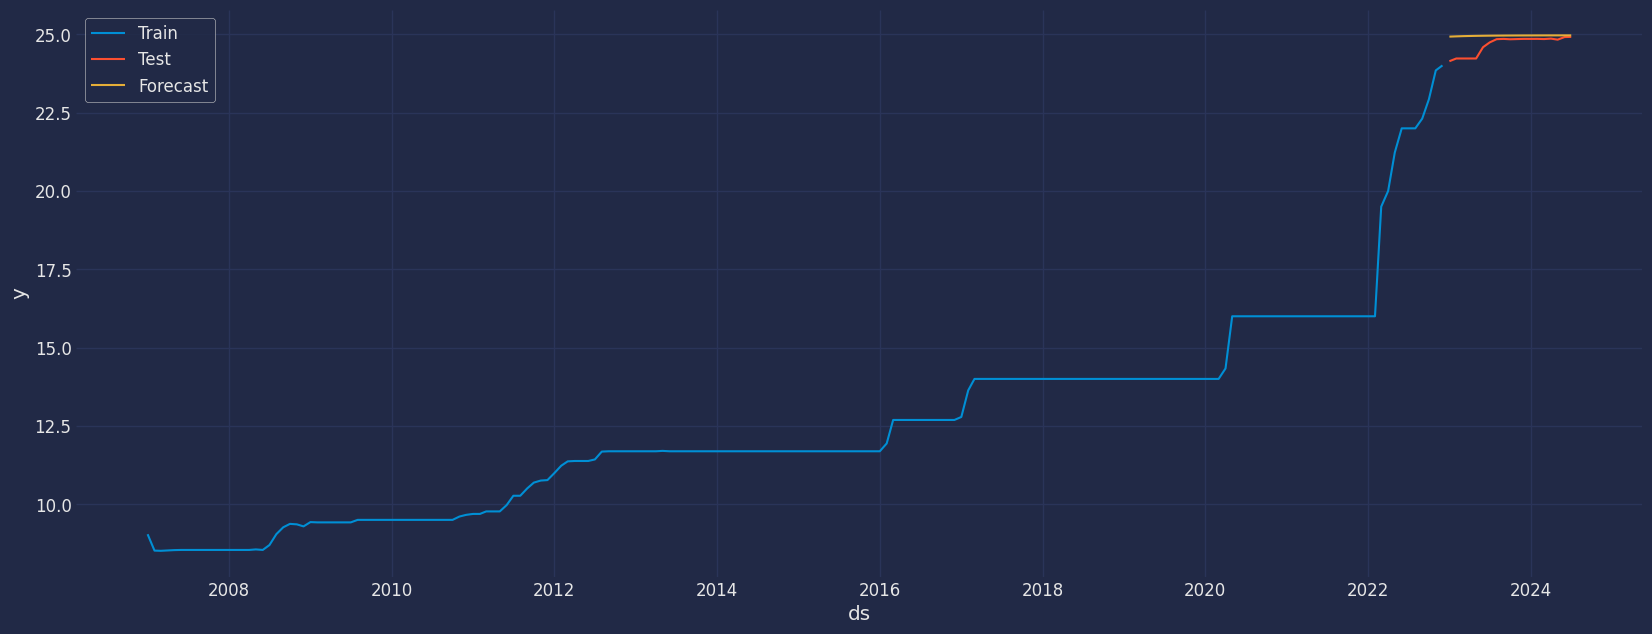

In [193]:
sns.lineplot(train,x="ds", y="y", label="Train")
sns.lineplot(test, x="ds", y="y", label="Test")
sns.lineplot(forecast,x="ds", y="hat", label="Forecast",)
plt.show()

In [194]:
y_hat_dict = autoets.predict(h=horizon, level=[80,90,95])
y_hat_dict

{'mean': array([24.92822908, 24.9364576 , 24.94304041, 24.94830667, 24.95251967,
        24.95589007, 24.9585864 , 24.96074345, 24.9624691 , 24.96384962,
        24.96495403, 24.96583756, 24.96654438, 24.96710984, 24.96756221,
        24.96792411, 24.96821362, 24.96844523, 24.96863052]),
 'lo-95': array([23.94739612, 23.43394484, 22.97934596, 22.55655803, 22.15739495,
        21.77825948, 21.41704142, 21.07219653, 20.74243192, 20.4265918 ,
        20.12361529, 19.83252084, 19.55240011, 19.28241467, 19.02179324,
        18.76982845, 18.52587332, 18.28933723, 18.05968179]),
 'lo-90': array([24.10508811, 23.67550914, 23.29505608, 22.94108794, 22.60677706,
        22.28913841, 21.98642816, 21.697372  , 21.42090225, 21.15606282,
        20.90197448, 20.65782237, 20.42285127, 20.19636327, 19.97771559,
        19.76631826, 19.56163121, 19.3631611 , 19.17045797]),
 'lo-80': array([24.28689688, 23.95401731, 23.65904963, 23.38442629, 23.12488585,
        22.87814911, 22.64289461, 22.41815928, 22

In [195]:
forecast["hat"]=y_hat_dict.get("mean")

forecast["lo-80"]=y_hat_dict.get("lo-80")
forecast["hi-80"]=y_hat_dict.get("hi-80")

forecast["lo-90"]=y_hat_dict.get("lo-80")
forecast["hi-90"]=y_hat_dict.get("hi-80")

forecast["lo-95"]=y_hat_dict.get("lo-95")
forecast["hi-95"]=y_hat_dict.get("hi-95")
forecast

,ds,hat,unique_id,lo-80,hi-80,lo-90,hi-90,lo-95,hi-95
0,2023-01-01,24.928229,1,24.286897,25.569561,24.286897,25.569561,23.947396,25.909062
1,2023-02-01,24.936458,1,23.954017,25.918898,23.954017,25.918898,23.433945,26.438970
2,2023-03-01,24.943040,1,23.659050,26.227031,23.659050,26.227031,22.979346,26.906735
3,2023-04-01,24.948307,1,23.384426,26.512187,23.384426,26.512187,22.556558,27.340055
4,2023-05-01,24.952520,1,23.124886,26.780153,23.124886,26.780153,22.157395,27.747644
5,2023-06-01,24.955890,1,22.878149,27.033631,22.878149,27.033631,21.778259,28.133521
6,2023-07-01,24.958586,1,22.642895,27.274278,22.642895,27.274278,21.417041,28.500131
7,2023-08-01,24.960743,1,22.418159,27.503328,22.418159,27.503328,21.072197,28.849290
8,2023-09-01,24.962469,1,22.203135,27.721803,22.203135,27.721803,20.742432,29.182506
9,2023-10-01,24.963850,1,21.997096,27.930603,21.997096,27.930603,20.426592,29.501107


In [196]:
df['unique_id'] = df['unique_id'].astype(object)
df_plot=df.merge(forecast, how='left', on=['unique_id', 'ds'])

C:\Users\esteb\AppData\Local\Temp\ipykernel_31948\2378475230.py:2: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(df_plot.index, df_plot["y"],label="Actual", linestyle="-")
C:\Users\esteb\AppData\Local\Temp\ipykernel_31948\2378475230.py:3: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(df_plot.index, df_plot["hat"],label="Forecas", linestyle="-")


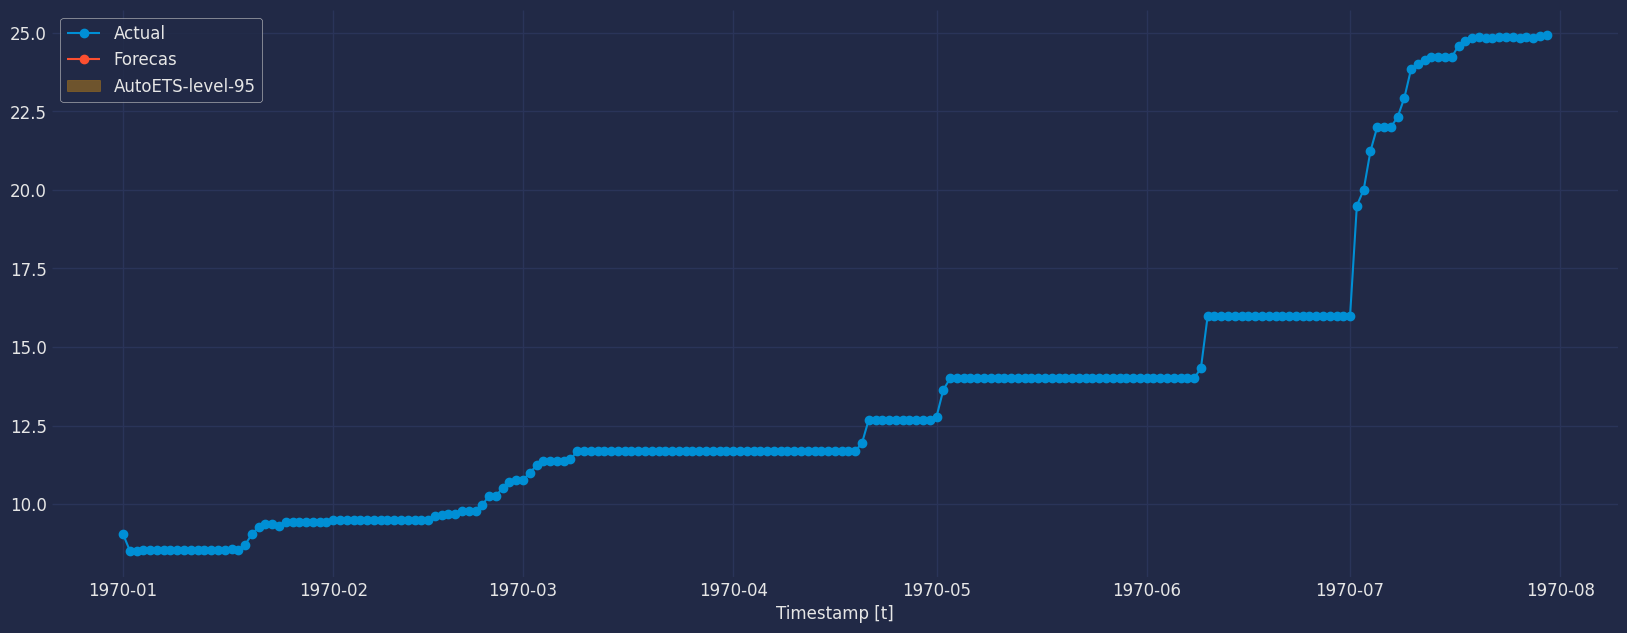

In [197]:
fig, ax = plt.subplots()
plt.plot_date(df_plot.index, df_plot["y"],label="Actual", linestyle="-")
plt.plot_date(df_plot.index, df_plot["hat"],label="Forecas", linestyle="-")
ax.fill_between(df_plot.index, 
                df_plot['lo-80'], 
                df_plot['hi-80'],
                alpha=.35,
                color='orange',
                label='AutoETS-level-95')
ax.set_title('', fontsize=22)
ax.set_ylabel('', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=12)
plt.legend(fontsize=12)
ax.grid(True)

plt.show()

In [198]:
model_evaluation(test["y"], forecast["hat"], "AutoETS")

Model Evaluation: AutoETS
MSE is : 0.1568196950415211
MAE is : 0.28820046899665863
RMSE is : 0.39600466542898344
MAPE is : 1.1810852095186706
R2 is : -0.9682625775422016
corr is : 0.9269687464800286



Con el ETS en ZZZ confimamos que en efecto el mejor modelo parece ser el que usa errores multiplicativos, tendencia aditiva y sin estacionalidad 